### CSE-221710302064 - Vishnu Pulipaka

### Twitter Sentiment Analysis

In [5]:
# Importing Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [6]:
# Reading the dataset
tweets=pd.read_csv("train.csv",encoding = 'latin - 1')
tweets.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
tweets.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

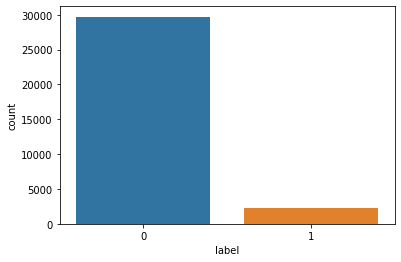

In [8]:
sns.countplot(tweets.label)

In [9]:
# Checking size of dataset
tweets.shape

(31962, 3)

In [10]:
# Checking for NULL values
tweets.isna().sum() # No NULL Values can be found

id       0
label    0
tweet    0
dtype: int64

In [11]:
# Checking Statistical data 
tweets.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


#### Cleaning with nltk

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:
# Removing Stopwords
# stopwords are words like [a, an ,the ,is ,are...etc] that are not useful for the prediction
from nltk.corpus import stopwords
stop=stopwords.words("english")
stop.extend(["i'm","I'm"])

tweets.tweet=tweets.tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
tweets.head()

,id,label,tweet
0,1,0,@user father dysfunctional selfish drags kids ...
1,2,0,@user @user thanks #lyft credit can't use caus...
2,3,0,bihday majesty
3,4,0,#model love u take u time urÃ°ÂÂÂ±!!! Ã°ÂÂ...
4,5,0,factsguide: society #motivation


In [14]:
# a function to clear the text data from user-mentions , special characters, hyperlinks
# using regular expressions
def clean(x):
    x=' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z0-9']+)|(\w+:\/\/\S+)"," ",x).split())
    return x

In [15]:
# Removing Hyperlinks, userIDS
tweets.tweet = tweets.tweet.apply(clean)
tweets.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfun...
1,2,0,user thanks lyft credit can't use cause offer ...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [16]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
# Applying Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
wnl = WordNetLemmatizer()
tweets.tweet=tweets.tweet.apply(lambda x:' '.join([wnl.lemmatize(word,'v') for word in x.split()])) # v stands for verb
tweets.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drag kid dysfunct...
1,2,0,user thank lyft credit can't use cause offer w...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [18]:
tweets.tweet=tweets.tweet.apply(lambda x:' '.join([word.lower() for word in x.split()]))

#### Applying same techniques for test data for cleaning

In [19]:
#reading test data input into X_test
X_test = pd.read_csv('test.csv',encoding='latin- 1')
# Removing Stopwords
X_test.tweet=X_test.tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# Removing Hyperlinks, userIDS
X_test.tweet = X_test.tweet.apply(clean)
# Applying Lemmatization
wnl1 = WordNetLemmatizer()
X_test.tweet=X_test.tweet.apply(lambda x:' '.join([wnl1.lemmatize(word,'v') for word in x.split()])) # v stands for verb
X_test.tweet=X_test.tweet.apply(lambda x:' '.join([word.lower() for word in x.split()]))

#### Reading result data

In [20]:
# reading the test output into y_test
y_test = pd.read_csv('result.csv')

#### Applying TFIDF Vectorizer for train and test data

In [21]:
## Importing TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [22]:
#Applying tfidf to train data
new_inp = tfidf.fit_transform(tweets.tweet)
new_inp
#Applying tfidf to test data
test_inp = tfidf.transform(X_test.tweet)
test_inp

<17197x35865 sparse matrix of type '<class 'numpy.float64'>'
	with 123657 stored elements in Compressed Sparse Row format>

#### SMOTE

In [23]:
# importing the SMOTE tool
from imblearn.combine import SMOTETomek

# creating an object
smk = SMOTETomek(random_state=42)

# generating the input and output training data after applying the sythentic generation 
X_train,y_train=smk.fit_sample(new_inp,tweets.label)

In [24]:
print(X_train.shape)
print(y_train.shape)

(59440, 35865)
(59440,)


In [25]:
check=pd.DataFrame(y_train)          # converting y_train from np.array to data frame to check for the balancing outcome
check.iloc[:,0].value_counts()       #  using index to generate counts of the label

## we can see that both the labels are no equalized

1    29720
0    29720
Name: label, dtype: int64

In [26]:
tweets.label.value_counts()

## the label counts of the original data before synthetic generation.

0    29720
1     2242
Name: label, dtype: int64

### Logistic regression

In [27]:
# importing the model
from sklearn.linear_model import LogisticRegression

# creating object
reg=LogisticRegression()

# fitting object on training data
reg.fit(X_train,y_train)

LogisticRegression()

In [28]:
#predicting on train data
lg_train_pred=reg.predict(X_train)
#predicting on test data
lg_test_pred=reg.predict(test_inp)

In [29]:
# Classification report on train and test
from sklearn.metrics import classification_report,recall_score
print("on training data :")
print(classification_report(y_train,lg_train_pred,digits=4))
print('----------------------------------------------------------------')
print('on testing data :')
print(classification_report(y_test.label,lg_test_pred,digits=4))

on training data :
              precision    recall  f1-score   support

           0     0.9672    0.9681    0.9676     29720
           1     0.9680    0.9672    0.9676     29720

    accuracy                         0.9676     59440
   macro avg     0.9676    0.9676    0.9676     59440
weighted avg     0.9676    0.9676    0.9676     59440

----------------------------------------------------------------
on testing data :
              precision    recall  f1-score   support

           0     0.9960    0.9396    0.9670     16282
           1     0.4646    0.9333    0.6204       915

    accuracy                         0.9392     17197
   macro avg     0.7303    0.9364    0.7937     17197
weighted avg     0.9678    0.9392    0.9485     17197



In [30]:
recall_score(y_test.label,lg_test_pred)

0.9333333333333333

In [31]:
## Hyper parameter turing for Logistic Regression

## Hyper parameter turing for Logistic Regression

In [32]:
# Taking Parameters for performing HyperParameter Tuning
dual=[True,False]
max_iter= [800]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [33]:
# Creating New Object for Hyper Parameter Tuning
new_lr = LogisticRegression(penalty='l2')
# Importing GridSearchCV for finding Best parameters
from sklearn.model_selection import GridSearchCV
# Initializing Object for GridSearchCV 
grid_search = GridSearchCV(estimator=new_lr, param_grid=param_grid, cv = 3, n_jobs=-1)
# Fitting grid_search on Train data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.0, 1.5, 2.0, 2.5], 'dual': [True, False],
                         'max_iter': [800]})

In [34]:
grid_search.best_params_

{'C': 2.5, 'dual': False, 'max_iter': 800}

In [35]:
# creating a model with generated best parameters
new_lr=LogisticRegression(C=2.5,dual=False,max_iter=800)

# fitting on training data:
new_lr.fit(X_train,y_train)

LogisticRegression(C=2.5, max_iter=800)

In [36]:
# prediciton on training data
y_train_pred_tuned_LR=new_lr.predict(X_train)

# predicition on testing data
y_test_pred_tuned_LR=new_lr.predict(test_inp)

In [37]:
# Classification report on train and test
from sklearn.metrics import classification_report
print("on training data: ")
print(classification_report(y_train,y_train_pred_tuned_LR,digits=4))
print("on testing data: ")
print('----------------------------------------------------------------')
print(classification_report(y_test.label,y_test_pred_tuned_LR,digits=4))

on training data: 
              precision    recall  f1-score   support

           0     0.9889    0.9797    0.9843     29720
           1     0.9799    0.9890    0.9844     29720

    accuracy                         0.9844     59440
   macro avg     0.9844    0.9844    0.9844     59440
weighted avg     0.9844    0.9844    0.9844     59440

on testing data: 
----------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9941    0.9437    0.9683     16282
           1     0.4736    0.9005    0.6207       915

    accuracy                         0.9414     17197
   macro avg     0.7338    0.9221    0.7945     17197
weighted avg     0.9664    0.9414    0.9498     17197



### Multinomial NB

In [38]:
# import BernNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [39]:
#predicting on train data
mnb_train_pred=mnb.predict(X_train)
#predicting on test data
mnb_test_pred=mnb.predict(test_inp)

In [40]:
# Classification report on train and test
from sklearn.metrics import classification_report
print(classification_report(y_train,mnb_train_pred))
print('----------------------------------------------------------------')
print(classification_report(y_test.label,mnb_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     29720
           1       0.95      0.99      0.97     29720

    accuracy                           0.97     59440
   macro avg       0.97      0.97      0.97     59440
weighted avg       0.97      0.97      0.97     59440

----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     16282
           1       0.36      0.90      0.52       915

    accuracy                           0.91     17197
   macro avg       0.68      0.91      0.74     17197
weighted avg       0.96      0.91      0.93     17197



In [41]:
# recall on test data
from sklearn.metrics import recall_score
recall_score(y_test.label,mnb_test_pred)

0.9027322404371585

## Decision tree Classifier

In [42]:
# import the library
from sklearn.tree import DecisionTreeClassifier
# create object
dtree=DecisionTreeClassifier(criterion='entropy')
# fitting the data
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [43]:
#predicting on train data
dtree_train_pred=dtree.predict(X_train)
#predicting on test data
dtree_test_pred=dtree.predict(test_inp)

In [44]:
# Classification report on train and test
from sklearn.metrics import classification_report
print("on training data")
print(classification_report(y_train,dtree_train_pred,digits=4))
print("on testing data")
print('----------------------------------------------------------------')
print(classification_report(y_test.label,dtree_test_pred,digits=4))

on training data
              precision    recall  f1-score   support

           0     0.9998    1.0000    0.9999     29720
           1     1.0000    0.9998    0.9999     29720

    accuracy                         0.9999     59440
   macro avg     0.9999    0.9999    0.9999     59440
weighted avg     0.9999    0.9999    0.9999     59440

on testing data
----------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9782    0.9684    0.9732     16282
           1     0.5223    0.6153    0.5650       915

    accuracy                         0.9496     17197
   macro avg     0.7502    0.7918    0.7691     17197
weighted avg     0.9539    0.9496    0.9515     17197



## Hyper tuning from Decision Tree

In [3]:
#  setting range of parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1)
    
}

In [ ]:
#Import the GridSearchCV 
from sklearn.model_selection import GridSearchCV

# initialization of GridSearch with the parameters- ModelName and the dictionary of parameters
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=grid_param,n_jobs=-1,cv=3,verbose=2)

# applying gridsearch onto dataset
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 32.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
# generating best params
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 1}

In [50]:
# creating model with best parameters:
clf=DecisionTreeClassifier(criterion='gini',max_depth=31,min_samples_leaf=1)

In [51]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=31)

In [52]:
## predicting on training:
y_train_pred_tuned=clf.predict(X_train)
## predicting on testing data:
y_test_pred_tuned=clf.predict(test_inp)

In [53]:
# Classification report on train and test after hyper tuning for decision tree
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred_tuned,digits=4))
print('----------------------------------------------------------------')
print(classification_report(y_test.label,y_test_pred_tuned,digits=4))

              precision    recall  f1-score   support

           0     0.8561    0.9921    0.9191     29720
           1     0.9906    0.8333    0.9052     29720

    accuracy                         0.9127     59440
   macro avg     0.9234    0.9127    0.9121     59440
weighted avg     0.9234    0.9127    0.9121     59440

----------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9833    0.9719    0.9776     16282
           1     0.5861    0.7071    0.6409       915

    accuracy                         0.9578     17197
   macro avg     0.7847    0.8395    0.8093     17197
weighted avg     0.9622    0.9578    0.9597     17197



In [54]:
# Classification report on train and test before hyper tuning for decision tree.
from sklearn.metrics import classification_report
print(classification_report(y_train,dtree_train_pred,digits=4))
print('----------------------------------------------------------------')
print(classification_report(y_test.label,dtree_test_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9998    1.0000    0.9999     29720
           1     1.0000    0.9998    0.9999     29720

    accuracy                         0.9999     59440
   macro avg     0.9999    0.9999    0.9999     59440
weighted avg     0.9999    0.9999    0.9999     59440

----------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9782    0.9684    0.9732     16282
           1     0.5223    0.6153    0.5650       915

    accuracy                         0.9496     17197
   macro avg     0.7502    0.7918    0.7691     17197
weighted avg     0.9539    0.9496    0.9515     17197



In [55]:
!pip install GetOldTweets3

  Using cached https://files.pythonhosted.org/packages/ed/f4/a00c2a7c90801abc875325bb5416ce9090ac86d06a00cc887131bd73ba45/GetOldTweets3-0.0.11-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/78/43/95d42e386c61cb639d1a0b94f0c0b9f0b7d6b981ad3c043a836c8b5bc68b/pyquery-1.4.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3b/d4/3b5c17f00cce85b9a1e6f91096e1cc8e8ede2e1be8e96b87ce1ed09e92c5/cssselect-1.1.0-py2.py3-none-any.whl


In [56]:
import GetOldTweets3 as got
tag=input("Enter the topic to run sentiment analysis on :")
limit=1000

Enter the topic to run sentiment analysis on :feminist movement


In [57]:
# setting search criteria using tweetCriteria model
tweetCriteria = got.manager.TweetCriteria().setQuerySearch(tag)\
                                           .setMaxTweets(limit)             

# get tweets using getTweets method:
tweet = got.manager.TweetManager.getTweets(tweetCriteria)

In [58]:
# converting the "data" and "text" attributes from model to list of lists:
tweet_in = [[i.date, i.text] for i in tweet]

In [59]:
# converting the list of lists to dataframe:
tweet_in=pd.DataFrame(tweet_in,columns=["time","text"])
tweet_in.head()

,time,text
0,2020-07-14 12:53:32+00:00,Everything about the left can be explained wit...
1,2020-07-14 12:50:13+00:00,"White feminism is trash, and here's a great re..."
2,2020-07-14 12:34:52+00:00,i don’t understand how some people aren’t femi...
3,2020-07-14 12:11:46+00:00,You are the reason people keep opposing the fe...
4,2020-07-14 12:02:14+00:00,"You're mixing culture with Christ. In Christ, ..."


In [60]:
str(tweet_in.iloc[0,0]).split(" ")

['2020-07-14', '12:53:32+00:00']

In [61]:
tweet_in.head()

,time,text
0,2020-07-14 12:53:32+00:00,Everything about the left can be explained wit...
1,2020-07-14 12:50:13+00:00,"White feminism is trash, and here's a great re..."
2,2020-07-14 12:34:52+00:00,i don’t understand how some people aren’t femi...
3,2020-07-14 12:11:46+00:00,You are the reason people keep opposing the fe...
4,2020-07-14 12:02:14+00:00,"You're mixing culture with Christ. In Christ, ..."


In [62]:
#making the predictions by converting the dataFrame by using tfidf vectorizer
real_world_pred=clf.predict(tfidf.transform(tweet_in.iloc[:,1]))

In [63]:
# Creating the output column
tweet_in['label']=real_world_pred

In [64]:
tweet_in.head()

,time,text,label
0,2020-07-14 12:53:32+00:00,Everything about the left can be explained wit...,0
1,2020-07-14 12:50:13+00:00,"White feminism is trash, and here's a great re...",1
2,2020-07-14 12:34:52+00:00,i don’t understand how some people aren’t femi...,1
3,2020-07-14 12:11:46+00:00,You are the reason people keep opposing the fe...,1
4,2020-07-14 12:02:14+00:00,"You're mixing culture with Christ. In Christ, ...",0


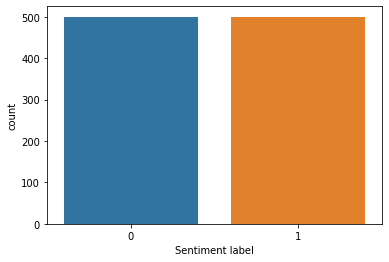

In [65]:
import matplotlib.pyplot as plt
plt.xlabel("Sentiment label")
plt.ylabel("count")
sns.countplot(real_world_pred)
# 0- positive tweets
# 1- negative tweets
plt.show()

# Observations :
  - The topic "feminist movement" seems to have almost equally divided sentiment over twitter
  

In [67]:
tweet_in.label.value_counts()

1    500
0    500
Name: label, dtype: int64

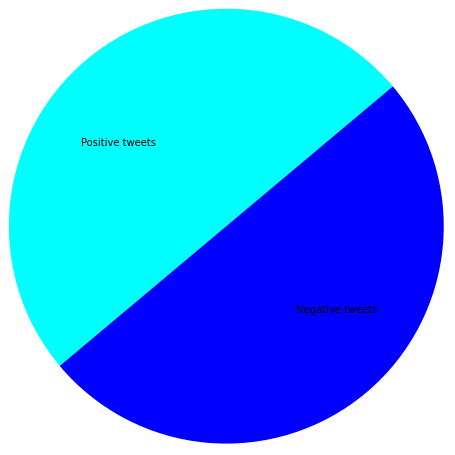

In [68]:
plt.pie(list(tweet_in.label.value_counts()), labels=['Positive tweets','Negative tweets'],
        labeldistance=0.5,radius= 2.5,startangle=40,colors= ['cyan',"blue"])
plt.show()

# Observations:
- There are about 506 positive tweets 
and 494 negative tweets